<a href="https://colab.research.google.com/github/congltk1234/Fashion_Items_Classification/blob/main/HM/ALexNet_HMclass.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# https://drive.google.com/file/d/1vdh_ICQD1QBwOYkFMMrea_6kO4GYLDR8/view?usp=sharing
!gdown 1vdh_ICQD1QBwOYkFMMrea_6kO4GYLDR8
!unzip "HM_items_classification.zip" -d "/content/HM_items_classification"

Kết quả truyền trực tuyến bị cắt bớt đến 5000 dòng cuối.
  inflating: /content/HM_items_classification/test/bag/0553055001.jpg  
  inflating: /content/HM_items_classification/test/bag/0553317001.jpg  
  inflating: /content/HM_items_classification/test/bag/0560783021.jpg  
  inflating: /content/HM_items_classification/test/bag/0566564002.jpg  
  inflating: /content/HM_items_classification/test/bag/0569244002.jpg  
  inflating: /content/HM_items_classification/test/bag/0569246008.jpg  
  inflating: /content/HM_items_classification/test/bag/0569246011.jpg  
  inflating: /content/HM_items_classification/test/bag/0575923001.jpg  
  inflating: /content/HM_items_classification/test/bag/0592272001.jpg  
  inflating: /content/HM_items_classification/test/bag/0596006003.jpg  
  inflating: /content/HM_items_classification/test/bag/0599832002.jpg  
  inflating: /content/HM_items_classification/test/bag/0601282002.jpg  
  inflating: /content/HM_items_classification/test/bag/0601730002.jpg  
  infla

In [ ]:
# @title ANN 1hidden layer
# Tensorflow
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras import callbacks
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers.experimental import preprocessing

def build_LeNet5(input_shape=(227,227,3)):
    # Sequential model
    model = keras.Sequential([

    # Input shape
    keras.Input(shape=input_shape),

    # Layer 1
    layers.Conv2D(filters=6, kernel_size=(5,5), padding='same', activation='relu'),
    layers.MaxPooling2D(pool_size=(2,2), strides=(2,2), padding='valid'),

    # Layer 2
    layers.Conv2D(filters=16, kernel_size=(5,5), padding='valid', activation='relu'),
    layers.MaxPooling2D(pool_size=(2,2), strides=(2,2), padding="valid"),

    # Layer 3
    layers.Flatten(),                                    # shape=(400,1)
    layers.Dense(units=120, activation='relu'),       # shape=(120,1)

    # Layer 4
    layers.Dense(units=84, activation='relu'),        # shape=(84,1)

    # Layer 5
    layers.Dense(units=10, activation='softmax')         # shape=(10,1)
    ])

    # Compile model (SGD = stochastic gradient descent)
    model.compile(optimizer='SGD',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

    return model

# Model summary
model=build_LeNet5()
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 227, 227, 6)       456       
                                                                 
 max_pooling2d (MaxPooling2  (None, 113, 113, 6)       0         
 D)                                                              
                                                                 
 conv2d_7 (Conv2D)           (None, 109, 109, 16)      2416      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 54, 54, 16)        0         
 g2D)                                                            
                                                                 
 flatten_3 (Flatten)         (None, 46656)             0         
                                                                 
 dense_9 (Dense)             (None, 120)              

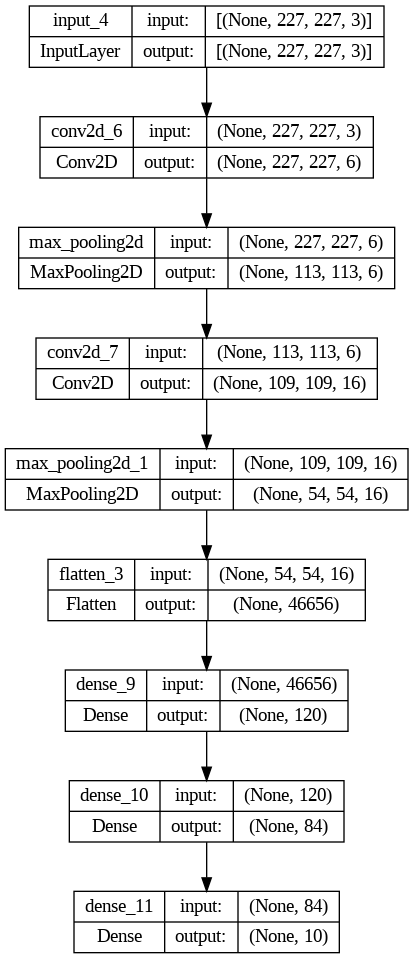

In [ ]:
from keras.utils import plot_model
plot_model(model, to_file='ANN.png', show_shapes=True, show_layer_names=True)

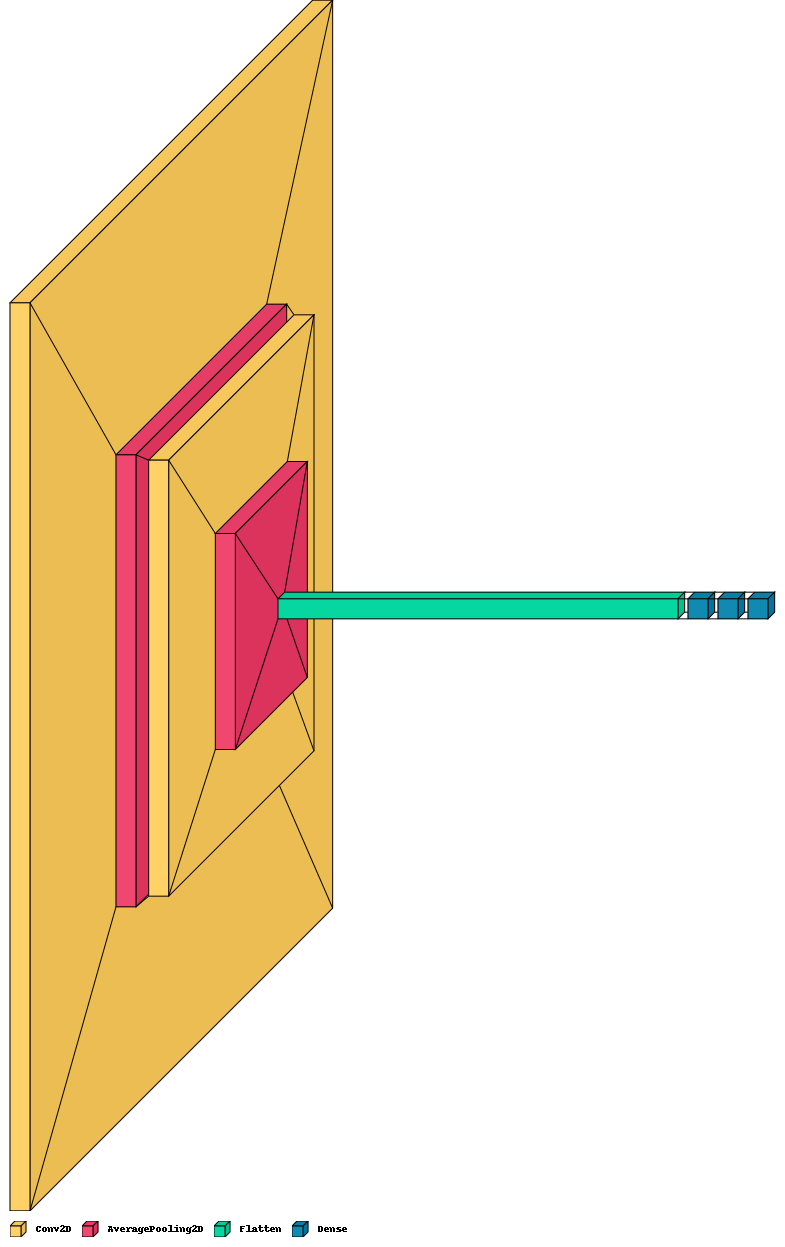

In [ ]:
!pip install visualkeras

import visualkeras
visualkeras.layered_view(model, legend=True)

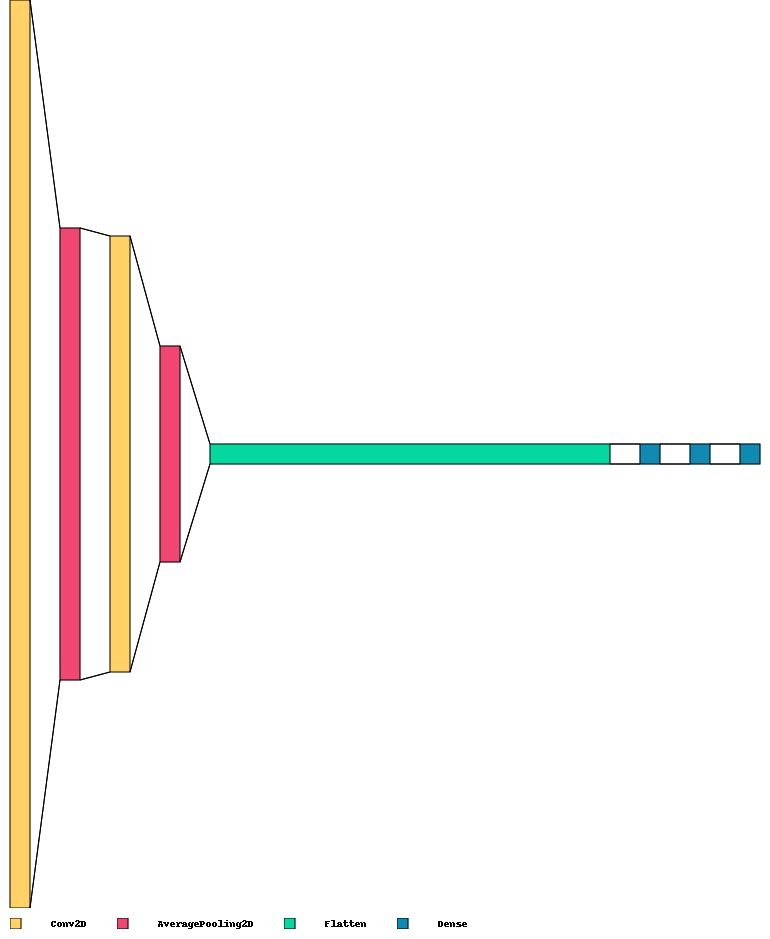

In [ ]:
visualkeras.layered_view(model, legend=True, draw_volume=False,spacing=30)

In [ ]:
BATCH_SIZE = 32
#Start
batch_size = 32
target_size=(227, 227)

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image

train = ImageDataGenerator(rescale=1/255, validation_split=0.2)
test = ImageDataGenerator(rescale=1/255)

train_dir = '/content/HM_items_classification/train'
test_dir = '/content/HM_items_classification/test'
# Create the training data generator
train_dataset = train.flow_from_directory(
    train_dir,
    target_size=target_size,
    batch_size=batch_size,
    class_mode='categorical',
    color_mode="rgb",
    subset='training'  # Specify the subset as 'training' for the training set
)

# Create the validation data generator
val_dataset = train.flow_from_directory(
    train_dir,
    target_size=target_size,
    batch_size=batch_size,
    class_mode='categorical',
    color_mode="rgb",
    subset='validation'  # Specify the subset as 'validation' for the validation set
)
test_dataset = test.flow_from_directory(test_dir, target_size=target_size,batch_size=batch_size, class_mode = 'categorical', color_mode="rgb")

Found 3204 images belonging to 10 classes.
Found 796 images belonging to 10 classes.
Found 1000 images belonging to 10 classes.


In [ ]:
epoch = 200

from tensorflow import keras
from keras.callbacks import ModelCheckpoint
checkpoint_filepath = 'lenet5_epoch_{epoch:02d}.h5'
model_checkpoint = ModelCheckpoint(checkpoint_filepath,
                                   save_weights_only=True,
                                   period=50,  # Save weights every 50 epochs
                                   verbose=1)
import time
# get the start time
st = time.time()
history = model.fit(train_dataset, epochs=epoch,
                    steps_per_epoch=len(train_dataset),
                    validation_data=val_dataset,
                    validation_steps=len(val_dataset),
                    callbacks=[model_checkpoint],
                    verbose=True)


print('Execution time:', time.time() - st, 'seconds')

Epoch 1/200
101/101 [==============================] - 10s 84ms/step - loss: 2.1250 - accuracy: 0.2428 - val_loss: 2.1113 - val_accuracy: 0.3015
Epoch 2/200
101/101 [==============================] - 7s 74ms/step - loss: 1.7012 - accuracy: 0.4139 - val_loss: 1.6315 - val_accuracy: 0.4837
Epoch 3/200
101/101 [==============================] - 9s 85ms/step - loss: 1.4447 - accuracy: 0.5190 - val_loss: 1.2945 - val_accuracy: 0.5791
Epoch 4/200
101/101 [==============================] - 8s 84ms/step - loss: 1.3898 - accuracy: 0.5549 - val_loss: 1.3698 - val_accuracy: 0.5616
Epoch 5/200
101/101 [==============================] - 7s 71ms/step - loss: 1.1565 - accuracy: 0.6208 - val_loss: 1.1943 - val_accuracy: 0.6106
Epoch 6/200
101/101 [==============================] - 8s 77ms/step - loss: 1.0248 - accuracy: 0.6604 - val_loss: 1.1334 - val_accuracy: 0.6520
Epoch 7/200
101/101 [==============================] - 8s 78ms/step - loss: 0.8982 - accuracy: 0.7076 - val_loss: 0.9569 - val_accuracy

In [ ]:
import matplotlib.pyplot as plt
fig,axes = plt.subplots(1,2, figsize=(12,8))
fig.suptitle("LeNet modified 's evaluation for HM dataset ",fontsize=20)
axes[0].plot(history.history['loss'][:100])
axes[0].plot(history.history['val_loss'][:100])
axes[0].set_title('Model Loss')
axes[0].set_ylabel('Loss')
axes[0].set_xlabel('Epoch')
axes[0].legend(['Train','Validate'])


axes[1].plot(history.history['accuracy'][:100])
axes[1].plot(history.history['val_accuracy'][:100])
axes[1].set_title('Model Accuracy')
axes[1].set_ylabel('Accuracy')
axes[1].set_xlabel('Epoch')
axes[1].legend(['Train','Validate'])
plt.show()


import json

# Convert and write JSON object to file
with open("200epoch_Lenet_HM.json", "w") as outfile:
    json.dump(history.history, outfile)

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay
import numpy as np
# Plot non-normalized confusion matrix
plt.figure(figsize=(10,3))

Y_pred = model.predict_generator(test_dataset, len(test_dataset) // batch_size+1)
y_pred = np.argmax(Y_pred, axis=1)

disp = ConfusionMatrixDisplay.from_predictions(
    test_dataset.classes, y_pred,
    # display_labels=class_names,
    cmap=plt.cm.Blues,
    normalize=None,
)
disp.ax_.set_title("Confusion matrix")

# print(disp.confusion_matrix)
# Rotate x-axis labels
disp.ax_.set_xticklabels(disp.ax_.get_xticklabels(), rotation=45, ha='right')

plt.show()

In [ ]:
from sklearn.metrics import classification_report
class_names = list(train_dataset.class_indices.keys())
print(classification_report(test_dataset.classes, y_pred, target_names=class_names))
from sklearn.metrics import accuracy_score
print(accuracy_score(test_dataset.classes, y_pred))
from sklearn.metrics import f1_score
print(f1_score(test_dataset.classes, y_pred, average='weighted'))